In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook

import math

#import cv2
import pims
from PIL import Image

import skimage

import json

#own modules / functions
import pylattice

import pylattice.functions.InputProcessing as inproc
import pylattice.functions.TiffProcessing as tiffproc



# input data

In [2]:
path = '/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/'


inputParameters = pd.read_csv(path+'_inputParameters.csv',names=['key','value'])


inputDataFolder = inproc.getInputParameter(inputParameters,"inputDataFolder")
outputDataFolder = inproc.getInputParameter(inputParameters,"outputDataFolder")

slave_outputDataFolder  = inproc.getInputParameter(inputParameters,"slave_outputDataFolder")
master_outputDataFolder  = inproc.getInputParameter(inputParameters,"master_outputDataFolder")

slave_uniqueFilenameString = inproc.getInputParameter(inputParameters,"slave_uniqueFilenameString")
master_uniqueFilenameString = inproc.getInputParameter(inputParameters,"master_uniqueFilenameString")


slave_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"slave_trackingProcessedBildFilename")
master_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"master_trackingProcessedBildFilename")


trackingCsvFilename = inproc.getInputParameter(inputParameters,"trackingCsvFilename")


framerate_msec = float(inproc.getInputParameter(inputParameters,"framerate_msec"))
movieLength = int(inproc.getInputParameter(inputParameters,"movieLength"))



In [3]:
# read the raw csv data for further processing


filepath = path + outputDataFolder+'/'+trackingCsvFilename
print(path)

data = pd.read_csv(filepath,header=0)


allTrackIds = np.unique(data['trackId'].values)

longtracks = data[data['tracklength'] >= 1]
allLongTrackIds = np.unique(longtracks['trackId'].values)
print(len(allTrackIds))
print(len(allLongTrackIds))

allLongTrackLengths = []
for trackId in allLongTrackIds:
    trackData = data[data['trackId'] == trackId]
    trackLength = trackData['tracklength'].values[0]
    allLongTrackLengths.append(trackLength)


/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/
484
484


# define lifetime cohorts and determine distribution into the cohorts

In [4]:

#lifetimeCohorts = [[0, 6], [6,12],[12,18],[18,24],[24,30],[30,70]] #frames

lifetimeCohorts = [ [0,2],[2,4],[4,6],[6,8],[8,10],[10,100]] #frames



trackIdsAssignedToCohorts = []
for i in range(0,len(lifetimeCohorts)):
    trackIdsAssignedToCohorts.append(np.array([]))

for k in range(0,len(allLongTrackLengths)):
    for i in range(0,len(lifetimeCohorts)):
        tracklength = allLongTrackLengths[k]
        trackId = allLongTrackIds[k]
        #print(tracklength)
        if((tracklength >lifetimeCohorts[i][0]) & (tracklength <=lifetimeCohorts[i][1])):
            trackIdsAssignedToCohorts[i] = np.append(trackIdsAssignedToCohorts[i],trackId)

print(trackIdsAssignedToCohorts)

[array([ 106.,  107.,  108.,  109.,  110.,  111.,  112.,  113.,  114.,
        115.,  116.,  117.,  118.,  119.,  120.,  121.,  122.,  123.,
        124.,  125.,  126.,  127.,  128.,  129.,  130.,  131.,  132.,
        133.,  134.,  135.,  136.,  137.,  138.,  139.,  140.,  141.,
        142.,  143.,  144.,  145.,  146.,  147.,  148.,  149.,  150.,
        151.,  152.,  153.,  154.,  155.,  156.,  157.,  158.,  159.,
        160.,  161.,  162.,  163.,  164.,  165.,  174.,  175.,  176.,
        177.,  178.,  179.,  180.,  181.,  182.,  183.,  184.,  185.,
        186.,  187.,  188.,  189.,  190.,  191.,  192.,  193.,  194.,
        195.,  196.,  206.,  207.,  208.,  209.,  210.,  211.,  212.,
        213.,  214.,  215.,  216.,  217.,  218.,  219.,  220.,  221.,
        222.,  223.,  224.,  225.,  227.,  228.,  229.,  230.,  231.,
        232.,  233.,  234.,  235.,  236.,  237.,  238.,  249.,  250.,
        251.,  252.,  253.,  254.,  255.,  256.,  257.,  258.,  259.,
        260.,  261.

296
72
34
32
50
0


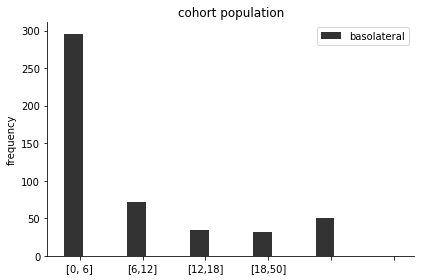

In [5]:
# data to plot

cohorts_n = []
#print(trackIdsAssignedToCohorts_baso)
for cohortIdArray in trackIdsAssignedToCohorts:
    print(len(cohortIdArray))
    cohorts_n.append(len(cohortIdArray))

A = (cohorts_n[0], cohorts_n[1],cohorts_n[2],cohorts_n[3],cohorts_n[4],cohorts_n[5])
n_groups = len(A) 
    
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
 
rects1 = plt.bar(index, A, bar_width,
                 alpha=opacity,
                 color='k',
                 label='basolateral')




 
#plt.xlabel('Person')
plt.ylabel('frequency')
plt.title('cohort population')
plt.xticks(index + bar_width/3, ('[0, 6]', '[6,12]','[12,18]', '[18,50]'))

plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
 
plt.tight_layout()
plt.show()

